<a href="https://colab.research.google.com/github/fernandovieira1/estat_ML/blob/main/testes_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes de hipóteses

## Bibliotecas

In [1]:
import numpy as np
import math
from scipy.stats import norm

## Base de dados

In [2]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                            150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                            154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                            157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                            161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                            164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                            168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                            171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [3]:
H0_media = np.mean(dados_originais)
H0_media

159.25

In [4]:
H0_desvio_padrao = np.std(dados_originais)
H0_desvio_padrao

13.65

In [5]:
dados_novos = dados_originais * 1.03
dados_novos

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [6]:
H1_media = np.mean(dados_novos)
H1_media

164.0275

In [7]:
H1_desvio_padrao = np.std(dados_novos)
H1_desvio_padrao

14.0595

In [8]:
H1_n = len(dados_novos)
H1_n

100

In [9]:
alpha = 0.05

## Teste de hipótese Z

### Teste manual

In [10]:
Z = (H1_media - H0_media) / (H1_desvio_padrao / math.sqrt(H1_n))
Z

3.398058252427187

In [11]:
norm.cdf(3.398058252427187), norm.ppf(0.9996606701617486)

(0.9996606701617486, 3.3980582524271936)

In [12]:
Z = norm.cdf(Z)
Z

0.9996606701617486

In [ ]:
# Se do lado direito da distribuição, subtrair 1 - Z

In [13]:
p = 1 - Z
p

0.00033932983825135654

In [14]:
if p < alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


### Teste com o statsmodels

- https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.ztest.html

In [15]:
from statsmodels.stats.weightstats import ztest

In [16]:
_, p = ztest(dados_originais, dados_novos, # _ para não mostrar tstat, apenas o pvalue (p)
             value = H1_media - H0_media, # não precisa colocar a média, basta os dados originais
             alternative='larger') # nossa hipótese é de que a média é maior 

In [17]:
p

0.9999993877283934

**Teste T**

Fernando

In [18]:
df = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [21]:
df.mean()

161.77777777777777

In [22]:
np.std(df)

12.786953227391823

Crie uma nova variável também com alturas de 9 pessoas, porém, com valores diferentes


In [19]:
df2 = df*1.021

In [23]:
df2.mean()

165.1751111111111

In [24]:
np.std(df2)

13.055479245167055

In [20]:
from scipy.stats import ttest_rel

In [34]:
_, p = ttest_rel(df, df2)
p

4.0729224939301966e-10

In [ ]:
# H0: a média é df.mean()
# H1: a média é df2.mean()

In [35]:
alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


**Teste T**

Professor

In [26]:
dados_originais = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [27]:
dados_originais.mean(), np.std(dados_originais)

(161.77777777777777, 12.786953227391823)

In [28]:
dados_novos = dados_originais * 1.02
dados_novos

array([151.98, 163.2 , 149.94, 192.78, 178.5 , 171.36, 159.12, 163.2 ,
       155.04])

In [29]:
dados_novos.mean(), np.std(dados_novos)

(165.01333333333332, 13.042692291939664)

In [30]:
from scipy.stats import ttest_rel

In [31]:
_, p = ttest_rel(dados_originais, dados_novos)
p

4.072922493930298e-10

In [32]:
alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


## Teste qui quadrado

-https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#tabela = np.array([[30, 20], [22, 28]])
tabela = np.array([[45, 5], [5, 45]])

In [ ]:
tabela.shape

In [ ]:
_, p, _, _ = chi2_contingency(tabela)
p

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

## Seleção de atributos com testes de hipóteses - univariate SelectFdr

Testes estatísticos univariados são aqueles que envolvem uma variável dependente, por exemplo, teste t ou teste z para comparação de médias

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr

False discovery rate: https://en.wikipedia.org/wiki/False_discovery_rate

Proporção esperada de erros do tipo I. Um erro do tipo I é quando a hipótese nula é rejeitada incorretamente, ou seja, é obtido um falso positivo

Erro I: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/type-i-error-type-ii-error-decision/

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('ad.data', header=None)
dataset.head()

In [ ]:
dataset.shape

In [ ]:
X = dataset.iloc[:, 0:1558].values
X

In [ ]:
y = dataset.iloc[:, 1558].values
y

In [ ]:
np.unique(y, return_counts=True)

### Sem seleção de atributos

In [ ]:
naive1 = GaussianNB()
naive1.fit(X, y)
previsoes1 = naive1.predict(X)
accuracy_score(y, previsoes1)

### Seleção de atributos com Qui Quadrado

In [ ]:
selecao = SelectFdr(chi2, alpha=0.01)
X_novo = selecao.fit_transform(X, y)

In [ ]:
X.shape, X_novo.shape

In [ ]:
selecao.pvalues_, len(selecao.pvalues_)

In [ ]:
np.sum(selecao.pvalues_ <= 0.01)

In [ ]:
colunas = selecao.get_support()
colunas

In [ ]:
indices = np.where(colunas == True)
indices

In [ ]:
naive2 = GaussianNB()
naive2.fit(X_novo, y)
previsoes2 = naive2.predict(X_novo)
accuracy_score(y, previsoes2)

### Seleção de atributos com ANOVA

In [ ]:
#from sklearn.feature_selection import f_classif -- atualizado 10/08/2021
from sklearn.feature_selection import SelectFdr, f_classif

In [ ]:
selecao = SelectFdr(f_classif, alpha = 0.01)
X_novo_2 = selecao.fit_transform(X, y)

In [ ]:
X.shape, X_novo.shape, X_novo_2.shape

In [ ]:
selecao.pvalues_

In [ ]:
np.sum(selecao.pvalues_ < 0.01)

In [ ]:
naive3 = GaussianNB()
naive3.fit(X_novo_2, y)
previsoes3 = naive3.predict(X_novo_2)
accuracy_score(y, previsoes3)

## ANOVA

- Compara se existe diferença (quantitativa) entre as médias (das colunas -- as variáveis) do conjunto de dados

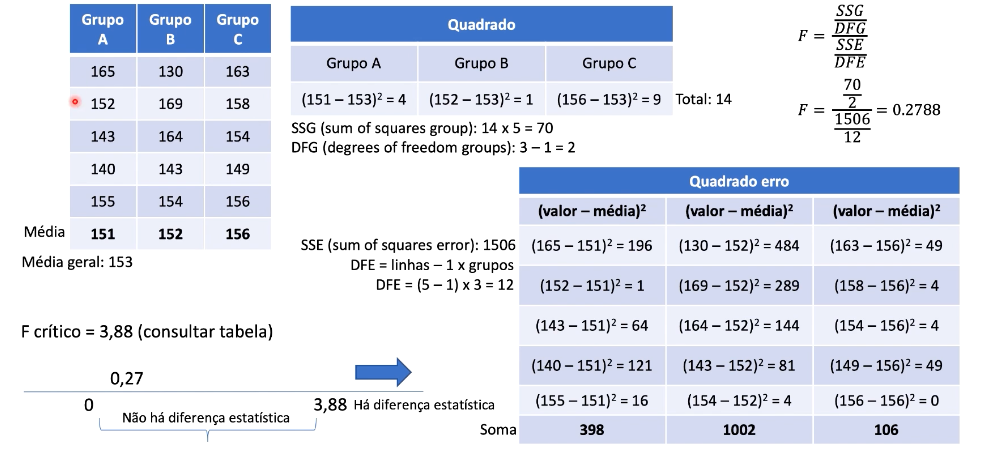

In [39]:
from IPython.display import Image
Image('anova.png')

In [36]:
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

In [37]:
from scipy.stats import f

In [38]:
f.ppf(1 - 0.05, dfn = 2, dfd = 12)

3.8852938346523933

In [ ]:
from scipy.stats import f_oneway # anova

In [ ]:
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

### Teste de Tukey

- Compara se existe diferença (categórica) entre os grupos

In [40]:
dados = {'valores': [165, 152, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [41]:
dados = {'valores': [70, 90, 80, 50, 20, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [42]:
import pandas as pd
dados_pd = pd.DataFrame(dados)
dados_pd

,valores,grupo
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [43]:
from statsmodels.stats.multicomp import MultiComparison

In [44]:
compara_grupos = MultiComparison(dados_pd['valores'], dados_pd['grupo'])

In [48]:
teste = compara_grupos.tukeyhsd()
print(teste)

# H0: grupos são iguais
# H1: grupos são diferentes

# True: rejeitamos H0 (grupos são diferentes)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B     90.0 0.001  58.494 121.506   True
     A      C     94.0 0.001  62.494 125.506   True
     B      C      4.0   0.9 -27.506  35.506  False
---------------------------------------------------


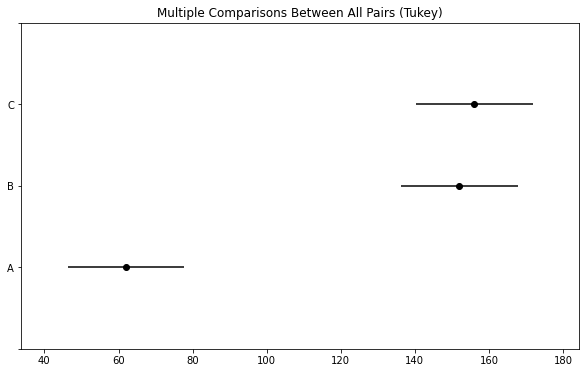

In [46]:
teste.plot_simultaneous();

## Resultados dos algoritmos de machine learning

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

In [ ]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

In [ ]:
min(X[0]), max(X[0])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
min(X[0]), max(X[0])

In [ ]:
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  
  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv = kfold)
  resultados_naive_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv.append(scores.mean())  
  
  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

In [ ]:
resultados_naive_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

### Teste de hipótese de Shapiro-Wilk

- https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro
shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv)

In [ ]:
import seaborn as sns
sns.distplot(resultados_naive_cv);

In [ ]:
sns.distplot(resultados_logistica_cv);

In [ ]:
sns.distplot(resultados_forest_cv);

### Teste de hipótese de D'Agostinho K^2

- https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test

In [ ]:
from scipy.stats import normaltest
normaltest(resultados_naive_cv), normaltest(resultados_logistica_cv), normaltest(resultados_forest_cv)

### Teste de hipótese de Anderson-Darling

- https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test

In [ ]:
from scipy.stats import anderson
anderson(resultados_naive_cv).statistic, anderson(resultados_logistica_cv).statistic, anderson(resultados_forest_cv).statistic

### Testes não paramétricos

- https://www.statisticshowto.com/parametric-and-non-parametric-data/#:~:text=Nonparametric%20tests%20can%20perform%20well,20%20items%20in%20each%20group).

If at all possible, you should us parametric tests, as they tend to be more accurate. Parametric tests have greater statistical power, which means they are likely to find a true significant effect. Use nonparametric tests only if you have to (i.e. you know that assumptions like normality are being violated). Nonparametric tests can perform well with non-normal continuous data if you have a sufficiently large sample size (generally 15-20 items in each group).

### Teste de Wilcoxon Signed-Rank

- https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import wilcoxon
_, p = wilcoxon(resultados_naive_cv, resultados_logistica_cv)
p

In [ ]:
_, p = wilcoxon(resultados_naive_cv, resultados_forest_cv)
p

In [ ]:
_, p = wilcoxon(resultados_logistica_cv, resultados_forest_cv)
p

### Teste de Friedman

- https://en.wikipedia.org/wiki/Friedman_test
- Teste de Nemenyi: https://en.wikipedia.org/wiki/Nemenyi_test

In [ ]:
from scipy.stats import friedmanchisquare

In [ ]:
_, p = friedmanchisquare(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv)
p

## ANOVA e Tukey - algoritmos

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv)
p

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada')

In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv]),
                         'algoritmo': ['naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest']}

In [ ]:
import pandas as pd
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_grupos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste = compara_grupos.tukeyhsd()
print(teste)

In [ ]:
teste.plot_simultaneous();

## Geração do arquivo com os resultados para o teste de Nemenyi

In [ ]:
resultados_algoritmos = {'naive_bayes': resultados_naive_cv,
                         'logistica': resultados_logistica_cv,
                         'random_forest': resultados_forest_cv}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

In [ ]:
resultados_df.to_excel('resultados_excel.xlsx', sheet_name='resultados')

## Dados não normais

In [ ]:
import pandas as pd
dataset = pd.read_csv('trip_d1_d2.csv', sep = ';')
dataset.head()

In [ ]:
import seaborn as sns
sns.distplot(dataset['D1']);

In [ ]:
sns.distplot(dataset['D2']);

In [ ]:
print(dataset['D2'])

In [ ]:
alpha = 0.05
from scipy.stats import shapiro
shapiro(dataset['D1']), shapiro(dataset['D2'])

In [ ]:
from scipy.stats import friedmanchisquare
_, p = friedmanchisquare(dataset['D1'], dataset['D2'])
p

In [ ]:
from scipy.stats import wilcoxon
_, p = wilcoxon(dataset['D1'], dataset['D2'])
p

In [ ]:
dataset['D1'].mean(), dataset['D2'].mean()